In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from subprocess import call

In [13]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Load dataset
ds_iris = datasets.load_iris()

ds = pd.DataFrame(ds_iris.data)
#ds.head()

In [15]:
#ds.info()
#ds.describe()

Printing the names of features and label types of wines

In [16]:
# print the names of the 13 features
print("Features:", ds_iris.feature_names, sep="\n")

# print the label type of wine(class_0, class_1, class_2)
print("\nLabels:", ds_iris.target_names)

# print data(feature)shape
print("No. of examples and features in the dataset are:", ds_iris.data.shape)

Features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Labels: ['setosa' 'versicolor' 'virginica']
No. of examples and features in the dataset are: (150, 4)


In [17]:
#split data set into train and test sets
training_data, testing_data, training_target, testing_target = train_test_split(ds_iris.data, ds_iris.target, test_size = 0.3, random_state = 7)

In [18]:
#Create a Decision Tree Classifier (using Gini)
dtc = DecisionTreeClassifier(criterion = "gini")

#Train the model using the training sets
dtc.fit(training_data, training_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
# Predict the classes of test data
pred = dtc.predict(testing_data)
print("prediction:",pred)

prediction: [2 1 0 1 1 0 2 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2 2 1 0 2 1 0 0
 0 0 2 2 2 2 2 1]


In [20]:
# Model Accuracy, how often is the classifier correct?
Accuracy = metrics.accuracy_score(testing_target, pred)
print("Accuracy:",Accuracy)

Accuracy: 0.8666666666666667


In [21]:
export_graphviz(dtc,out_file='iris_tree.dot',feature_names=list(ds_iris.feature_names),
               class_names=list(ds_iris.target_names), filled=True)

# Convert to png
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

0

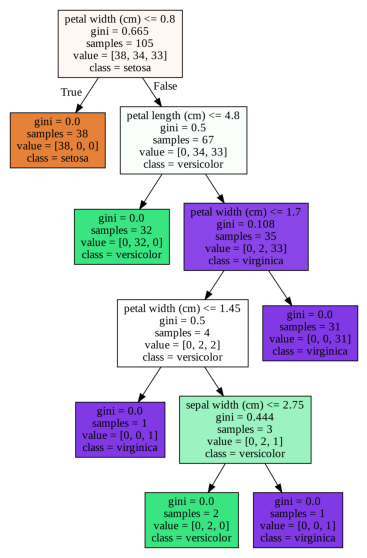

In [22]:
# Display in python
plt.figure(figsize = (10, 10))
plt.imshow(plt.imread('iris_tree.png'))
plt.axis('off')
plt.show()